# Price prediction using random forest machine learning

Random forest machine learning originates from the simple idea of decision trees. Decision trees use training data to caculate which specific decision node will maximise an entropy gain in the ouput. The issue with this simple chain of decision to determine an ouput is the huge sensitivity to training data. A small change in the input can lead to a huge change in the relevant decision nodes. To counteract this, Leo Breiman and Adele Cutler trademarked the random forest algorithum; it utilises. Bootstapped datasets are created from random sampling with replacement, and with these new datasets only a few of the rows are used. Let's say we have four bootsrapped datasets, a decision tree is formed in the same process as mentioned before, thus leaving us with four different decision trees; a random forest containing four trees. Now, to make predictions a new test dataset is collected. This data is passed through the four decision trees we previously made and the ouputs are collated. There are two main methods to then determine the prediction; majority voting is the most widely used method, but taking an average can often give a more precise measurement as it takes in a level of uncertainty.

Price prediction is an extremely difficult task. It would be a much easier job is stock prices were purely based on fundamentals; we have access to historical prices, balance sheet metrics and much more. However, stock price prediction is not simple as in fact it's majorly driven by mass psychology. This obvioulsy heavily ties into fundamental analysis but day-to-day price fluctuations in the market are driven by consumer sentiment. We can more heavily rely on fundamental company analysis in the long run as markets tend to correct themselves through the the idea of supply and demand equilibirum.

The idea of this code is to use historical data imported from YahooFinance to input into a random forest machine learning model to ouput the predicted direction of movement. When day trading it would be ideal to know the exact close price of that day, but we can calculate direction of movement with a much higher degree of certainty.

In [42]:
import yfinance as yf

start = start = '1950-01-01'
data = yf.download('^GSPC', start = start)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...,...
2024-08-21,5603.089844,5632.680176,5591.569824,5620.850098,5620.850098,3119670000
2024-08-22,5637.770020,5643.220215,5560.950195,5570.640137,5570.640137,2981530000
2024-08-23,5602.490234,5641.819824,5585.160156,5634.609863,5634.609863,3291940000


We predict direction, not absolute price values as that is more important

In [43]:
data['Tomorrow'] = data['Close'].shift(-1)
data['Target'] = (data['Tomorrow'] > data['Close']).astype(int)
data = data.loc['1990-01-09':].copy()
data

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
1990-01-09,353.829987,354.170013,349.609985,349.619995,349.619995,155210000,347.309998,0
1990-01-10,349.619995,349.619995,344.320007,347.309998,347.309998,175990000,348.529999,1
1990-01-11,347.309998,350.140015,347.309998,348.529999,348.529999,154390000,339.929993,0
1990-01-12,348.529999,348.529999,339.489990,339.929993,339.929993,183880000,337.000000,0
1990-01-15,339.929993,339.940002,336.570007,337.000000,337.000000,140590000,340.750000,1
...,...,...,...,...,...,...,...,...
2024-08-21,5603.089844,5632.680176,5591.569824,5620.850098,5620.850098,3119670000,5570.640137,0
2024-08-22,5637.770020,5643.220215,5560.950195,5570.640137,5570.640137,2981530000,5634.609863,1
2024-08-23,5602.490234,5641.819824,5585.160156,5634.609863,5634.609863,3291940000,5616.839844,0


In [22]:
ticker_symbol = 'META'  # Example: Apple Inc.

# Get the ticker object
ticker = yf.Ticker(ticker_symbol)

quarterly_financials = ticker.quarterly_financials

# Display the financials to identify the necessary data
#print(quarterly_financials)

quarterly_financials

,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Tax Effect Of Unusual Items,-18480000.0,-32560000.0,-10126137.918724,-16660000.0,-23200000.0,NaN,NaN
Tax Rate For Calcs,0.11,0.22,0.166002,0.17,0.16,NaN,NaN
Normalized EBITDA,19039000000.0,17832000000.0,20176000000.0,17116000000.0,12177000000.0,NaN,NaN
Total Unusual Items,-168000000.0,-148000000.0,-61000000.0,-98000000.0,-145000000.0,NaN,NaN
Total Unusual Items Excluding Goodwill,-168000000.0,-148000000.0,-61000000.0,-98000000.0,-145000000.0,NaN,NaN
Net Income From Continuing Operation Net Minority Interest,13465000000.0,12369000000.0,14017000000.0,11583000000.0,7788000000.0,NaN,NaN
Reconciled Depreciation,3637000000.0,3374000000.0,3172000000.0,2859000000.0,2623000000.0,NaN,NaN
Reconciled Cost Of Revenue,7308000000.0,6640000000.0,7695000000.0,6210000000.0,5945000000.0,NaN,NaN
EBITDA,18871000000.0,17684000000.0,20115000000.0,17018000000.0,12032000000.0,NaN,NaN
EBIT,15234000000.0,14310000000.0,16943000000.0,14159000000.0,9409000000.0,NaN,NaN


In [65]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

model = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'min_samples_split': [2, 10, 50, 100]
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='precision', n_jobs=-1)
grid_search.fit(train[predictors], train['Target'])

best_params = grid_search.best_params_

In [66]:
best_params

{'min_samples_split': 100, 'n_estimators': 500}

In [67]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 300, min_samples_split = 100, random_state = 1)

train = data.iloc[:-100]
test = data.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, n_estimators=300, random_state=1)

In [68]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
import pandas as pd

preds = pd.Series(preds, index = test.index)
preds

Date
2024-01-10    0
2024-01-11    0
2024-01-12    0
2024-01-16    1
2024-01-17    1
             ..
2024-05-28    0
2024-05-29    0
2024-05-30    0
2024-05-31    0
2024-06-03    0
Length: 100, dtype: int32

In [70]:
precision_score(test['Target'], preds)

0.5

In [71]:
test['Target']

Date
2024-01-10    0
2024-01-11    1
2024-01-12    0
2024-01-16    0
2024-01-17    1
             ..
2024-05-28    0
2024-05-29    0
2024-05-30    1
2024-05-31    1
2024-06-03    0
Name: Target, Length: 100, dtype: int32

In [75]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = 'Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

In [63]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [77]:
predictions = backtest(data, model, predictors)

In [79]:
predictions['Predictions'].value_counts()

Predictions
0    3208
1    2958
Name: count, dtype: int64

In [80]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5294117647058824

In [81]:
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.535031
0    0.464969
Name: count, dtype: float64

In [105]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_ratio_{horizon}"
    data[ratio_column] = data['Close'] / rolling_averages['Close']
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()['Target']
    #New_predictors.append(ratio_column)
    #new_predictors.append(trend_column)
    new_predictors += [ratio_column, trend_column]

In [110]:
data2[new_predictors]

,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000,RSI,Volume
Date,,,,,,,,,,,,
1993-12-21,0.999409,0.0,1.001632,2.0,1.003807,31.0,1.031905,127.0,1.180115,513.0,58.997256,273370000
1993-12-22,1.002166,1.0,1.003612,3.0,1.007955,32.0,1.036126,128.0,1.184877,514.0,60.658218,272440000
1993-12-23,1.000064,2.0,1.002002,3.0,1.007821,33.0,1.035989,129.0,1.184672,514.0,56.905096,227240000
1993-12-27,1.003369,2.0,1.006981,3.0,1.014212,34.0,1.042700,129.0,1.192287,515.0,60.457994,171200000
1993-12-28,1.000425,2.0,1.005646,4.0,1.014722,34.0,1.043261,130.0,1.192896,516.0,60.598309,200960000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-20,0.999007,1.0,1.008198,4.0,1.027831,38.0,1.134692,146.0,1.297353,527.0,54.400785,2994420000
2024-08-21,1.002115,1.0,1.006466,4.0,1.031191,38.0,1.138409,146.0,1.302215,527.0,60.910312,3119670000
2024-08-22,0.995514,1.0,0.996497,3.0,1.021153,37.0,1.127149,146.0,1.289964,527.0,64.973024,2981530000


In [107]:
data2 = data.copy()

delta = data2['Close'].diff(1)


gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

period = 14

avg_gain = gain.rolling(window=period, min_periods=1).mean()
avg_loss = loss.rolling(window=period, min_periods=1).mean()

rs = avg_gain / avg_loss

rsi = 100 - (100 / (1 + rs))
data2['RSI'] = rsi

data2

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000,RSI
Date,,,,,,,,,,,,,,,,,,,
1990-01-09,353.829987,354.170013,349.609985,349.619995,349.619995,155210000,347.309998,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-10,349.619995,349.619995,344.320007,347.309998,347.309998,175990000,348.529999,1,0.996685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1990-01-11,347.309998,350.140015,347.309998,348.529999,348.529999,154390000,339.929993,0,1.001753,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.560953
1990-01-12,348.529999,348.529999,339.489990,339.929993,339.929993,183880000,337.000000,0,0.987508,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.057714
1990-01-15,339.929993,339.940002,336.570007,337.000000,337.000000,140590000,340.750000,1,0.995672,0.0,0.978292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.100939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-21,5603.089844,5632.680176,5591.569824,5620.850098,5620.850098,3119670000,5570.640137,0,1.002115,1.0,1.006466,4.0,1.031191,38.0,1.138409,146.0,1.302215,527.0,60.910312
2024-08-22,5637.770020,5643.220215,5560.950195,5570.640137,5570.640137,2981530000,5634.609863,1,0.995514,1.0,0.996497,3.0,1.021153,37.0,1.127149,146.0,1.289964,527.0,64.973024
2024-08-23,5602.490234,5641.819824,5585.160156,5634.609863,5634.609863,3291940000,5616.839844,0,1.005709,1.0,1.005051,3.0,1.031721,38.0,1.138960,146.0,1.304141,527.0,84.376280


In [108]:
data2 = data2.dropna()
data2

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000,RSI
Date,,,,,,,,,,,,,,,,,,,
1993-12-21,465.839996,465.920013,464.029999,465.299988,465.299988,273370000,467.320007,1,0.999409,0.0,1.001632,2.0,1.003807,31.0,1.031905,127.0,1.180115,513.0,58.997256
1993-12-22,465.079987,467.380005,465.079987,467.320007,467.320007,272440000,467.380005,1,1.002166,1.0,1.003612,3.0,1.007955,32.0,1.036126,128.0,1.184877,514.0,60.658218
1993-12-23,467.299988,468.970001,467.299988,467.380005,467.380005,227240000,470.540009,1,1.000064,2.0,1.002002,3.0,1.007821,33.0,1.035989,129.0,1.184672,514.0,56.905096
1993-12-27,467.399994,470.549988,467.350006,470.540009,470.540009,171200000,470.940002,1,1.003369,2.0,1.006981,3.0,1.014212,34.0,1.042700,129.0,1.192287,515.0,60.457994
1993-12-28,470.609985,471.049988,469.429993,470.940002,470.940002,200960000,470.579987,0,1.000425,2.0,1.005646,4.0,1.014722,34.0,1.043261,130.0,1.192896,516.0,60.598309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-20,5602.879883,5620.509766,5585.500000,5597.120117,5597.120117,2994420000,5620.850098,1,0.999007,1.0,1.008198,4.0,1.027831,38.0,1.134692,146.0,1.297353,527.0,54.400785
2024-08-21,5603.089844,5632.680176,5591.569824,5620.850098,5620.850098,3119670000,5570.640137,0,1.002115,1.0,1.006466,4.0,1.031191,38.0,1.138409,146.0,1.302215,527.0,60.910312
2024-08-22,5637.770020,5643.220215,5560.950195,5570.640137,5570.640137,2981530000,5634.609863,1,0.995514,1.0,0.996497,3.0,1.021153,37.0,1.127149,146.0,1.289964,527.0,64.973024


In [109]:
new_predictors.append('RSI')
new_predictors.append('Volume')
new_predictors

['Close_ratio_2',
 'Trend_2',
 'Close_ratio_5',
 'Trend_5',
 'Close_ratio_60',
 'Trend_60',
 'Close_ratio_250',
 'Trend_250',
 'Close_ratio_1000',
 'Trend_1000',
 'RSI',
 'Volume']

In [88]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

In [89]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [90]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:, 1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index = test.index, name = 'Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

In [111]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score

predictions = backtest(data2, model, new_predictors)

In [112]:
predictions['Predictions'].value_counts()

Predictions
0.0    4616
1.0     608
Name: count, dtype: int64

In [113]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5444078947368421

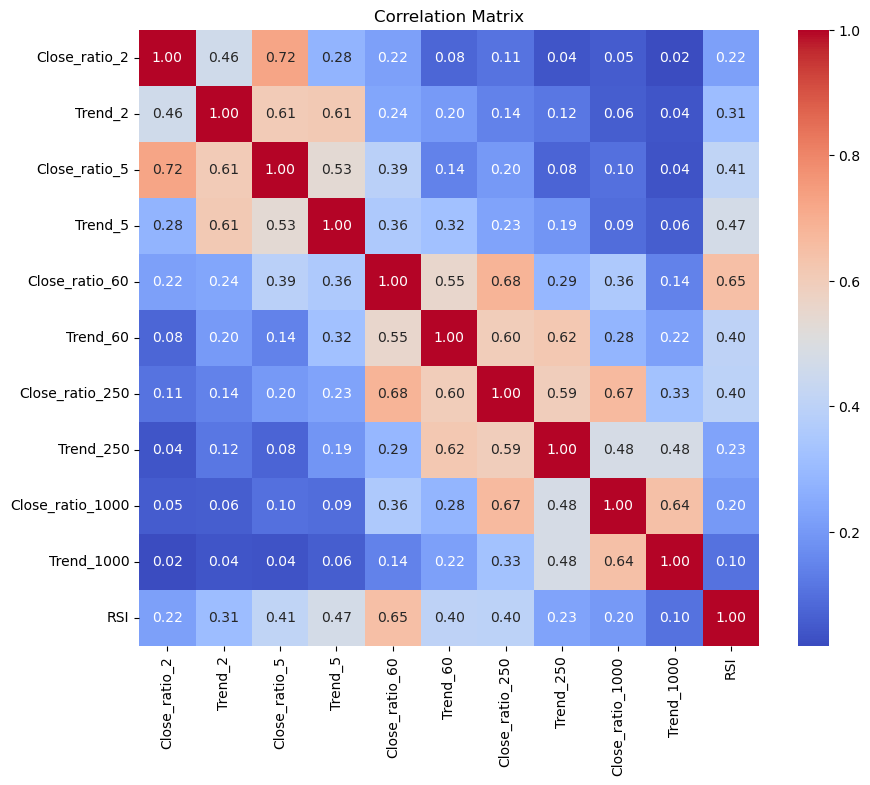

In [95]:
correlation_matrix = data2[new_predictors].corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [101]:
#new_predictors.remove('Close_ratio_60')
new_predictors.remove('Close_ratio_5')
new_predictors

['Close_ratio_2',
 'Trend_2',
 'Trend_5',
 'Trend_60',
 'Close_ratio_250',
 'Trend_250',
 'Close_ratio_1000',
 'Trend_1000',
 'RSI']

In [115]:
import json
import requests
import pandas as pd
from datetime import datetime, timedelta


resp = requests.get("https://eodhistoricaldata.com/api/eod/AAPL?api_token=demo&fmt=json")
json_data = json.loads(resp.content)
df = pd.DataFrame(json_data)
df

,date,open,high,low,close,adjusted_close,volume
0,1980-12-12,28.7392,28.8736,28.7392,28.7392,0.0989,469033600
1,1980-12-15,27.3728,27.3728,27.2608,27.2608,0.0938,175884800
2,1980-12-16,25.3792,25.3792,25.2448,25.2448,0.0869,105728000
3,1980-12-17,25.8720,26.0064,25.8720,25.8720,0.0891,86441600
4,1980-12-18,26.6336,26.7456,26.6336,26.6336,0.0917,73449600
...,...,...,...,...,...,...,...
11015,2024-08-23,225.6600,228.2200,224.3300,226.8400,226.8400,38677300
11016,2024-08-26,226.7600,227.2800,223.8900,227.1800,227.1800,30602200
11017,2024-08-27,226.0000,228.8500,224.8900,228.0300,228.0300,35934600
11018,2024-08-28,227.9200,229.8600,225.6800,226.4900,226.4900,38052200


In [126]:
pip install mt5_funcs

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mt5_funcs (from versions: none)
ERROR: No matching distribution found for mt5_funcs


In [119]:
import MetaTrader5 as mt5
import pandas as pd


TIMEFRAMES = ['M1', 'M5', 'M15', 'M30', 'H1', 'H4', 'D1', 'W1', 'MN1']
TIMEFRAME_DICT = {
    'M1': mt5.TIMEFRAME_M1,
    'M5': mt5.TIMEFRAME_M5,
    'M15': mt5.TIMEFRAME_M15,
    'M30': mt5.TIMEFRAME_M30,
    'H1': mt5.TIMEFRAME_H1,
    'H4': mt5.TIMEFRAME_H4,
    'D1': mt5.TIMEFRAME_D1,
    'W1': mt5.TIMEFRAME_W1,
    'MN1': mt5.TIMEFRAME_MN1,
}


def get_symbol_names():
    # connect to MetaTrader5 platform
    mt5.initialize()

    # get symbols
    symbols = mt5.symbols_get()
    symbols_df = pd.DataFrame(symbols, columns=symbols[0]._asdict().keys())

    symbol_names = symbols_df['name'].tolist()
    return symbol_names

In [127]:
from dash import Dash, html, dcc
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output, State
import pandas as pd
import plotly.graph_objects as go
import MetaTrader5 as mt5
from mt5_funcs import get_symbol_names, TIMEFRAMES, TIMEFRAME_DICT

# creates the Dash App
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

symbol_dropdown = html.Div([
    html.P('Symbol:'),
    dcc.Dropdown(
        id='symbol-dropdown',
        options=[{'label': symbol, 'value': symbol} for symbol in get_symbol_names()],
        value='EURUSD'
    )
])

timeframe_dropdown = html.Div([
    html.P('Timeframe:'),
    dcc.Dropdown(
        id='timeframe-dropdown',
        options=[{'label': timeframe, 'value': timeframe} for timeframe in TIMEFRAMES],
        value='D1'
    )
])

num_bars_input = html.Div([
    html.P('Number of Candles'),
    dbc.Input(id='num-bar-input', type='number', value='20')
])

# creates the layout of the App
app.layout = html.Div([
    html.H1('Real Time Charts'),

    dbc.Row([
        dbc.Col(symbol_dropdown),
        dbc.Col(timeframe_dropdown),
        dbc.Col(num_bars_input)
    ]),

    html.Hr(),

    dcc.Interval(id='update', interval=200),

    html.Div(id='page-content')

], style={'margin-left': '5%', 'margin-right': '5%', 'margin-top': '20px'})


@app.callback(
    Output('page-content', 'children'),
    Input('update', 'n_intervals'),
    State('symbol-dropdown', 'value'), State('timeframe-dropdown', 'value'), State('num-bar-input', 'value')
)
def update_ohlc_chart(interval, symbol, timeframe, num_bars):
    timeframe_str = timeframe
    timeframe = TIMEFRAME_DICT[timeframe]
    num_bars = int(num_bars)

    print(symbol, timeframe, num_bars)

    bars = mt5.copy_rates_from_pos(symbol, timeframe, 0, num_bars)
    df = pd.DataFrame(bars)
    df['time'] = pd.to_datetime(df['time'], unit='s')

    fig = go.Figure(data=go.Candlestick(x=df['time'],
                    open=df['open'],
                    high=df['high'],
                    low=df['low'],
                    close=df['close']))

    fig.update(layout_xaxis_rangeslider_visible=False)
    fig.update_layout(yaxis={'side': 'right'})
    fig.layout.xaxis.fixedrange = True
    fig.layout.yaxis.fixedrange = True

    return [
        html.H2(id='chart-details', children=f'{symbol} - {timeframe_str}'),
        dcc.Graph(figure=fig, config={'displayModeBar': False})
        ]


if __name__ == '__main__':
    # starts the server
    app.run_server()

ModuleNotFoundError: No module named 'mt5'

In [128]:
exchange.last_response_headers.get('Bitvavo-Ratelimit-Remaining')


NameError: name 'exchange' is not defined